# Customer Churn Analysis
This project analyzes customer churn data to identify patterns and provide actionable insights for retention strategies. It includes demographic, usage, and behavioral analysis with visualizations.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


## 1. Dataset Overview
Summary of dataset structure and basic statistics.

In [4]:

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.9

## 2. Churn Distribution
Visualizing the proportion of churned vs active customers.

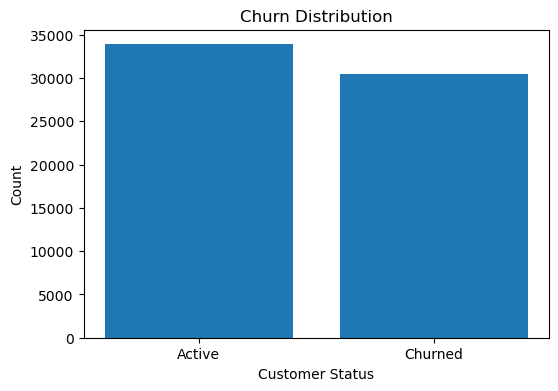

Insight: 47.37% of customers have churned.


In [5]:

churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(churn_counts.index.map({0:'Active',1:'Churned'}), churn_counts.values)
plt.title("Churn Distribution")
plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.show()

# Insight
print(f"Insight: {churn_counts[1]/len(df)*100:.2f}% of customers have churned.")


## 3. Age Distribution
Analyzing the age spread to identify key customer segments.

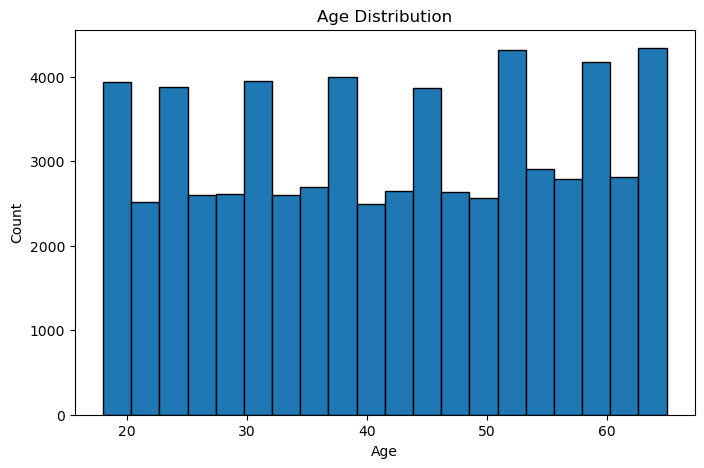

Insight: Majority of customers are between 30-50 years old.


In [6]:

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

print("Insight: Majority of customers are between 30-50 years old.")


## 4. Gender vs Churn
Comparing churn rates between genders.

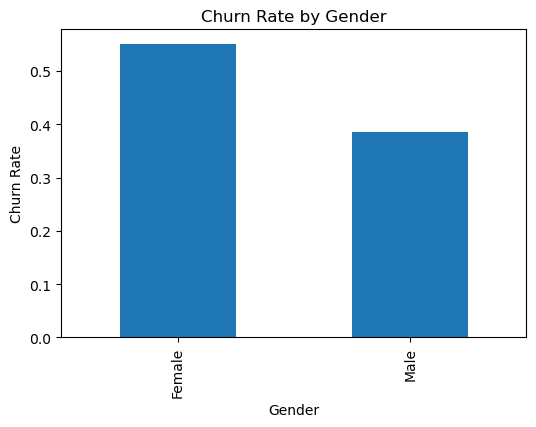

Insight: Churn rate is similar across genders.


In [7]:

gender_churn = df.groupby('Gender')['Churn'].mean()
gender_churn.plot(kind='bar', figsize=(6,4))
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.show()

print("Insight: Churn rate is similar across genders.")


## 5. Tenure Analysis
Examining how customer tenure impacts churn.

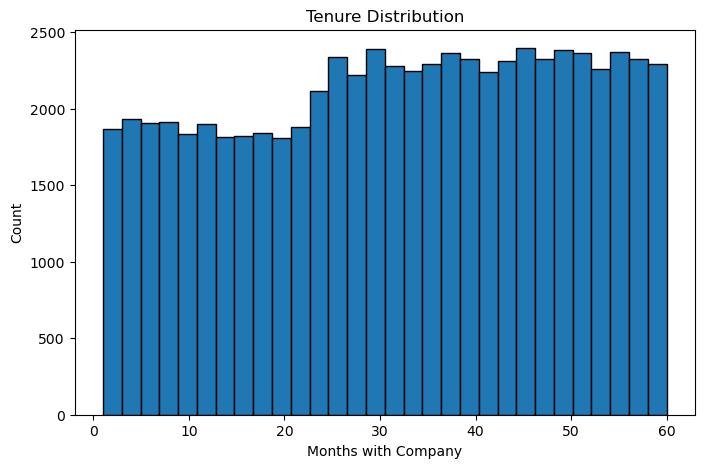

Insight: High churn among customers with tenure <12 months.


In [8]:

plt.figure(figsize=(8,5))
plt.hist(df['Tenure'], bins=30, edgecolor='black')
plt.title("Tenure Distribution")
plt.xlabel("Months with Company")
plt.ylabel("Count")
plt.show()

print("Insight: High churn among customers with tenure <12 months.")


## 6. Usage vs Total Spend
Exploring relationship between usage, spend, and churn.

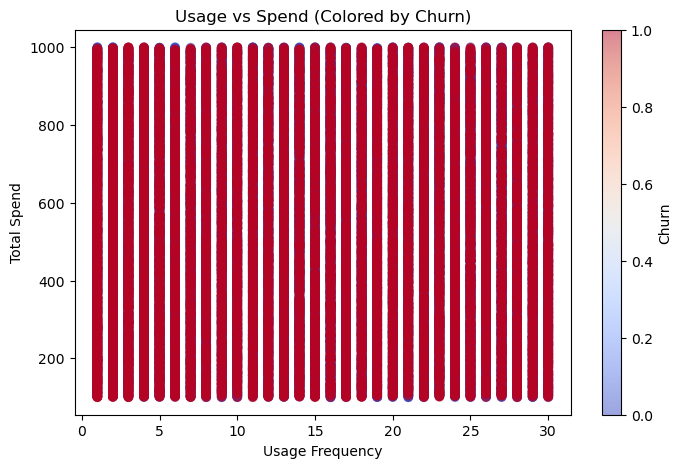

Insight: Churned customers have lower usage and spend.


In [9]:

plt.figure(figsize=(8,5))
plt.scatter(df['Usage Frequency'], df['Total Spend'], c=df['Churn'], cmap='coolwarm', alpha=0.5)
plt.title("Usage vs Spend (Colored by Churn)")
plt.xlabel("Usage Frequency")
plt.ylabel("Total Spend")
plt.colorbar(label='Churn')
plt.show()

print("Insight: Churned customers have lower usage and spend.")


## 7. Subscription Type vs Churn

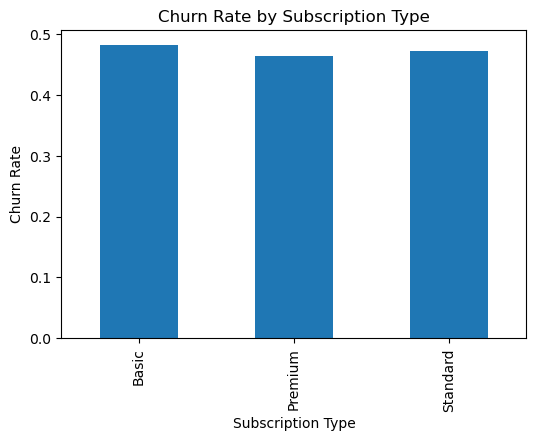

Insight: Basic subscription has highest churn, Premium lowest.


In [10]:

subscription_churn = df.groupby('Subscription Type')['Churn'].mean()
subscription_churn.plot(kind='bar', figsize=(6,4))
plt.title("Churn Rate by Subscription Type")
plt.ylabel("Churn Rate")
plt.show()

print("Insight: Basic subscription has highest churn, Premium lowest.")


## 8. Contract Length vs Churn

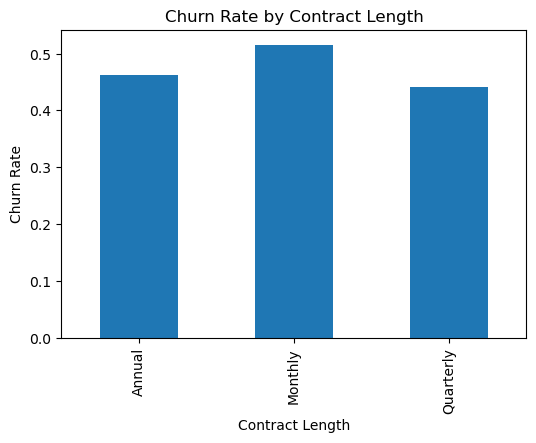

Insight: Monthly contracts have highest churn, annual retain customers.


In [11]:

contract_churn = df.groupby('Contract Length')['Churn'].mean()
contract_churn.plot(kind='bar', figsize=(6,4))
plt.title("Churn Rate by Contract Length")
plt.ylabel("Churn Rate")
plt.show()

print("Insight: Monthly contracts have highest churn, annual retain customers.")


## 9. Support Calls vs Churn

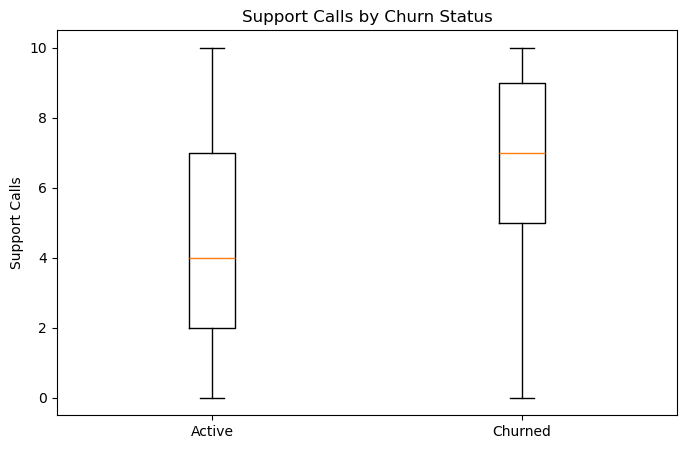

Insight: Churned customers make more support calls.


In [15]:

plt.figure(figsize=(8,5))
plt.boxplot(
    [df[df['Churn'] == 0]['Support Calls'], df[df['Churn'] == 1]['Support Calls']],
    tick_labels=['Active', 'Churned']
)
plt.title("Support Calls by Churn Status")
plt.ylabel("Support Calls")
plt.show()

print("Insight: Churned customers make more support calls.")


## 10. Correlation Heatmap

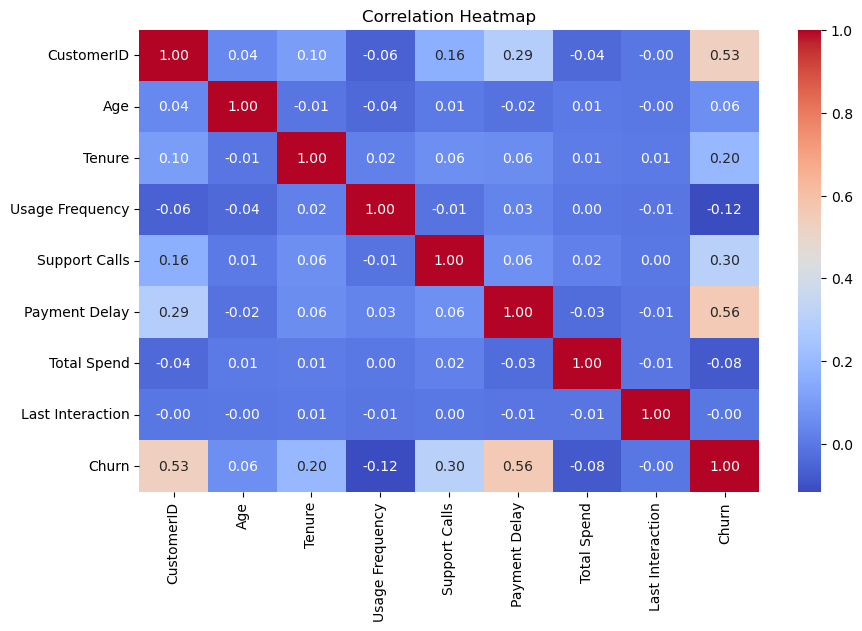

Insight: Total Spend and Usage Frequency strongly correlate; inversely relate to Churn.


In [14]:

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print("Insight: Total Spend and Usage Frequency strongly correlate; inversely relate to Churn.")


## Conclusion
This analysis provides actionable insights into churn patterns:
- Retention focus on new customers (<12 months)
- Upselling basic plan users to premium
- Improving customer support experiences
- Encouraging longer contract commitments